In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D, Dense
import cv2
import os
import glob
from lxml import etree
from sklearn.model_selection import train_test_split

# Loading Image dataset 

In [2]:
# Load images
img_dir = "Data/Images"
data_path = os.path.join(img_dir, '*g')
files = glob.glob(data_path)
files.sort()

files


['Data/Images\\Cars0.png',
 'Data/Images\\Cars1.png',
 'Data/Images\\Cars10.png',
 'Data/Images\\Cars100.png',
 'Data/Images\\Cars101.png',
 'Data/Images\\Cars102.png',
 'Data/Images\\Cars103.png',
 'Data/Images\\Cars104.png',
 'Data/Images\\Cars105.png',
 'Data/Images\\Cars106.png',
 'Data/Images\\Cars107.png',
 'Data/Images\\Cars108.png',
 'Data/Images\\Cars109.png',
 'Data/Images\\Cars11.png',
 'Data/Images\\Cars110.png',
 'Data/Images\\Cars111.png',
 'Data/Images\\Cars112.png',
 'Data/Images\\Cars113.png',
 'Data/Images\\Cars114.png',
 'Data/Images\\Cars115.png',
 'Data/Images\\Cars116.png',
 'Data/Images\\Cars117.png',
 'Data/Images\\Cars118.png',
 'Data/Images\\Cars119.png',
 'Data/Images\\Cars12.png',
 'Data/Images\\Cars120.png',
 'Data/Images\\Cars121.png',
 'Data/Images\\Cars122.png',
 'Data/Images\\Cars123.png',
 'Data/Images\\Cars124.png',
 'Data/Images\\Cars125.png',
 'Data/Images\\Cars126.png',
 'Data/Images\\Cars127.png',
 'Data/Images\\Cars128.png',
 'Data/Images\\Cars12

In [3]:

Image_size = 224
X = []

for file in files:
    img = cv2.imread(file)  # Read the image
    img = cv2.resize(img, (Image_size, Image_size))  # Resize the image
    X.append(np.array(img))  # Append the image to the list

X = np.array(X)  # Convert list to numpy array
print("Shape of X:", X.shape)  # Should be (num_images, height, width, channels)


    


Shape of X: (433, 224, 224, 3)


# Annotation Labels

In [4]:
# Load annotations
def resize_annotations(file):
    tree = etree.parse(file)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)  # Extract the value of width
        height = int(dim.xpath("height")[0].text)  # Extract the value of height

    for dim in tree.xpath("object/bndbox"):
        x_min = int(dim.xpath("xmin")[0].text) / (width / Image_size)  # Resize x_min
        y_min = int(dim.xpath("ymin")[0].text) / (height / Image_size)  # Resize y_min
        x_max = int(dim.xpath("xmax")[0].text) / (width / Image_size)  # Resize x_max
        y_max = int(dim.xpath("ymax")[0].text) / (height / Image_size)  # Resize y_max

    return [int(x_min), int(y_min), int(x_max), int(y_max)]

path = "Data/Annotations"
text_files = [os.path.join(path, file) for file in sorted(os.listdir(path))]  # List of annotation files

y = []
for i in text_files:
    y.append(resize_annotations(i))

y = np.array(y)  # Convert list to numpy array
print("Shape of y:", y.shape)  # Should be (num_annotations, 4)

Shape of y: (433, 4)


In [5]:
len(y)

433

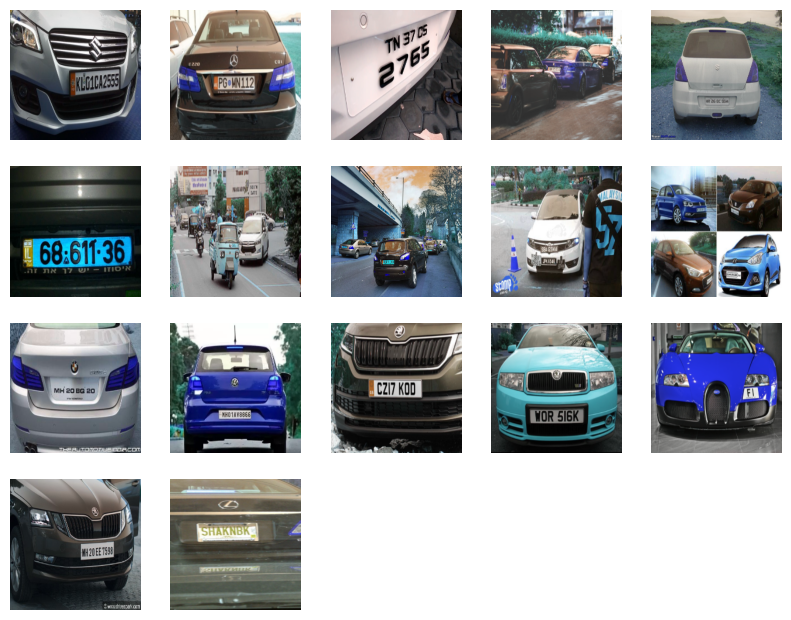

In [6]:
plt.figure(figsize=(10,20))
for i in range (0,17):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

# Exploring plate with CV2

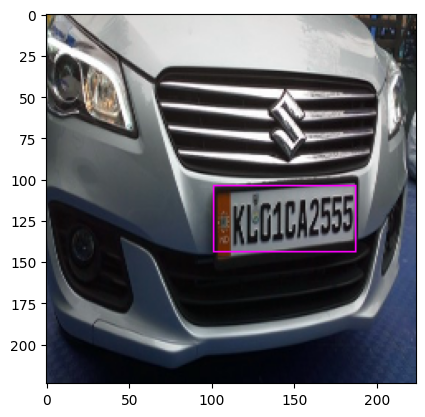

In [7]:
import cv2
import matplotlib.pyplot as plt

# Example with first image of dataset
# Ensure y[0] contains four integers: [x1, y1, x2, y2]
pt1 = (int(y[0][0]), int(y[0][1]))  # Top-left corner (x1, y1)
pt2 = (int(y[0][2]), int(y[0][3]))  # Bottom-right corner (x2, y2)

# Draw the rectangle on the image
image = cv2.rectangle(X[0], pt1, pt2, (255, 0, 255))  # X= image 

# Display the image
plt.imshow(image)
plt.show()

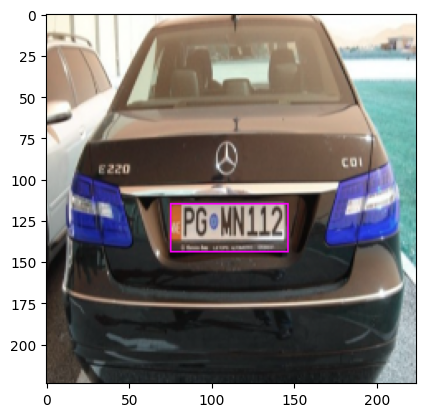

In [8]:
import cv2
import matplotlib.pyplot as plt

# Example with first image of dataset
# Ensure y[0] contains four integers: [x1, y1, x2, y2]
pt1 = (int(y[1][0]), int(y[1][1]))  # Top-left corner (x1, y1)
pt2 = (int(y[1][2]), int(y[1][3]))  # Bottom-right corner (x2, y2)

# Draw the rectangle on the image
image = cv2.rectangle(X[1], pt1, pt2, (255, 0, 255))  # X= image 

# Display the image
plt.imshow(image)
plt.show()

# Data preprocessing & train test split 

In [9]:
X = np.array(X)
y = np.array(y)
X[0]

array([[[135, 108,  54],
        [158, 124,  45],
        [179, 146,  79],
        ...,
        [ 41,  43,  42],
        [ 43,  41,  40],
        [ 37,  36,  34]],

       [[128, 105,  53],
        [154, 120,  41],
        [149, 119,  53],
        ...,
        [ 46,  46,  45],
        [ 42,  44,  41],
        [ 35,  37,  34]],

       [[127, 108,  63],
        [153, 121,  43],
        [153, 126,  63],
        ...,
        [ 44,  41,  41],
        [ 47,  49,  45],
        [ 36,  38,  34]],

       ...,

       [[ 40,  48,  71],
        [ 41,  49,  72],
        [ 42,  50,  73],
        ...,
        [ 43,  62,  99],
        [ 46,  67, 101],
        [ 47,  67, 102]],

       [[ 44,  52,  75],
        [ 43,  51,  74],
        [ 41,  49,  72],
        ...,
        [ 42,  62,  99],
        [ 47,  66, 103],
        [ 48,  67, 104]],

       [[ 44,  52,  75],
        [ 41,  50,  73],
        [ 39,  47,  70],
        ...,
        [ 45,  64, 102],
        [ 45,  64, 102],
        [ 46,  65, 103]]

In [10]:
X = X / 255  # Normalize the images
y = y / 255  # Normalize the bounding boxes
X[0]

array([[[0.52941176, 0.42352941, 0.21176471],
        [0.61960784, 0.48627451, 0.17647059],
        [0.70196078, 0.57254902, 0.30980392],
        ...,
        [0.16078431, 0.16862745, 0.16470588],
        [0.16862745, 0.16078431, 0.15686275],
        [0.14509804, 0.14117647, 0.13333333]],

       [[0.50196078, 0.41176471, 0.20784314],
        [0.60392157, 0.47058824, 0.16078431],
        [0.58431373, 0.46666667, 0.20784314],
        ...,
        [0.18039216, 0.18039216, 0.17647059],
        [0.16470588, 0.17254902, 0.16078431],
        [0.1372549 , 0.14509804, 0.13333333]],

       [[0.49803922, 0.42352941, 0.24705882],
        [0.6       , 0.4745098 , 0.16862745],
        [0.6       , 0.49411765, 0.24705882],
        ...,
        [0.17254902, 0.16078431, 0.16078431],
        [0.18431373, 0.19215686, 0.17647059],
        [0.14117647, 0.14901961, 0.13333333]],

       ...,

       [[0.15686275, 0.18823529, 0.27843137],
        [0.16078431, 0.19215686, 0.28235294],
        [0.16470588, 0

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Using CNN with keras

In [12]:
model = Sequential()

# feature extractor
# 1st convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# 2nd convolution layer
model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

# classification (fully connected) layer
model.add(Flatten())  # 2d to 1d
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# finally train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)      

d:\Data_Science\Car_Licence_Plate_Detection\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 667ms/step - accuracy: 0.4893 - loss: 0.1340 - val_accuracy: 0.3429 - val_loss: 0.0396
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.4930 - loss: 0.0542 - val_accuracy: 0.6571 - val_loss: 0.0204
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 669ms/step - accuracy: 0.5371 - loss: 0.0247 - val_accuracy: 0.6857 - val_loss: 0.0186
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 638ms/step - accuracy: 0.6143 - loss: 0.0202 - val_accuracy: 0.6286 - val_loss: 0.0149
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step - accuracy: 0.8104 - loss: 0.0113 - val_accuracy: 0.6286 - val_loss: 0.0117
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 652ms/step - accuracy: 0.8393 - loss: 0.0069 - val_accuracy: 0.6857 - val_loss: 0.0101
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.8461 - loss: 0.0035 - val_accuracy: 0.6000 - val_loss: 0.0114
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 661ms/step - accuracy: 0.8839 - loss: 0.0024 - val_accuracy: 0.

# CNN Evaluation

In [13]:
# Test 

scores =model.evaluate(X_test, y_test, verbose=0)
print("Score: %.2f%%" % (scores[1]*100))

Score: 72.41%


## VGG16

In [14]:
from tensorflow.keras.applications import VGG16
from keras.callbacks import EarlyStopping   ## stop model training when a monitored quantity has stopped improving

# create the model

model = Sequential()
# feature extractor
model.add(VGG16(weights='imagenet', include_top=False, input_shape=(Image_size, Image_size, 3)))
# classification (fully connected) layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

# freeze VGG16 Base layers 
model.layers[0].trainable = False

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# define early stopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True ,verbose=1)

# finally train the model
train= model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.3317 - loss: 0.1204 - val_accuracy: 0.6571 - val_loss: 0.1602
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5028 - loss: 0.1810 - val_accuracy: 0.6571 - val_loss: 0.1451
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5261 - loss: 0.1635 - val_accuracy: 0.6571 - val_loss: 0.1403
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5093 - loss: 0.1687 - val_accuracy: 0.6571 - val_loss: 0.1409
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5011 - loss: 0.1678 - val_accuracy: 0.6571 - val_loss: 0.1393
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5356 - loss: 0.1576 - val_accuracy: 0.0000e+00 - val_loss: 0.1199
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3611 - loss: 0.1384 - val_accuracy: 0.6571 - val_loss: 0.1136
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3931 - loss: 0.1300 - val_accuracy: 0.0571 - val_l

In [15]:
# Test 

scores =model.evaluate(X_test, y_test, verbose=0)
print("Score: %.2f%%" % (scores[1]*100))

Score: 81.61%


# Save model 

In [16]:
# Save the trained model
model.save("car_plate_detector.h5")
print("Model saved successfully")

Model saved successfully


# Number Plate detection :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


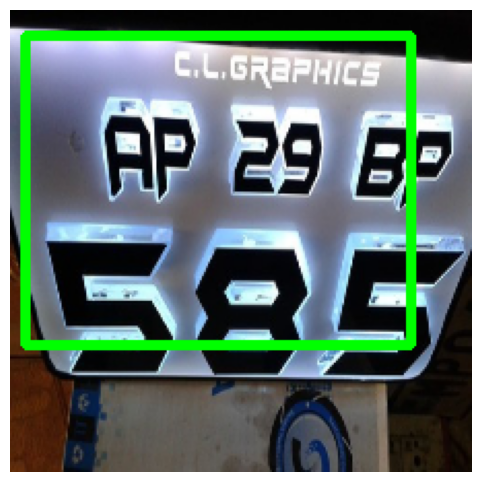

In [27]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model
model = load_model("car_plate_detector.h5")

def detect_car_plate(image_path):
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Error: The file '{image_path}' does not exist.")
        return

    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load the image from '{image_path}'. Check if the file is a valid image.")
        return

    # Resize and normalize the image
    img_resized = cv2.resize(img, (224, 224))  # Resize to match model input
    img_normalized = img_resized / 255.0       # Normalize

    # Expand dimensions to match model input shape (1, 224, 224, 3)
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predict bounding box
    pred = model.predict(img_input)[0]  # Get first (and only) prediction
    xmin, ymin, xmax, ymax = pred * 224  # Scale coordinates back

    # Draw rectangle on original image
    img_with_box = img_resized.copy()
    cv2.rectangle(img_with_box, 
                  (int(xmin), int(ymin)), 
                  (int(xmax), int(ymax)), 
                  (0, 255, 0), 3)

    # Display the result
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_with_box, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Test the function
test_image = "Data/Images/Cars114.png"  # Update this path to the correct location
detect_car_plate(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


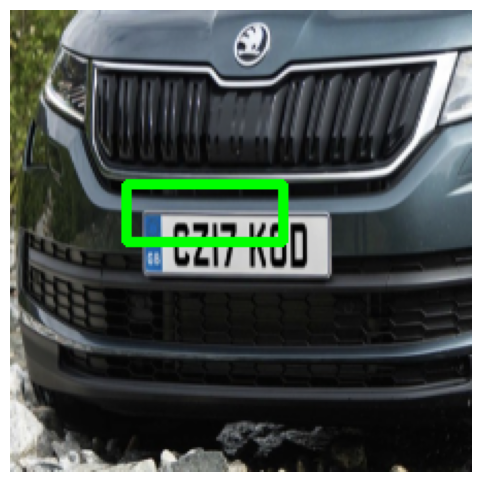

In [ ]:

test_image = "Data/Images/Cars109.png"  # Update this path to the correct location
detect_car_plate(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


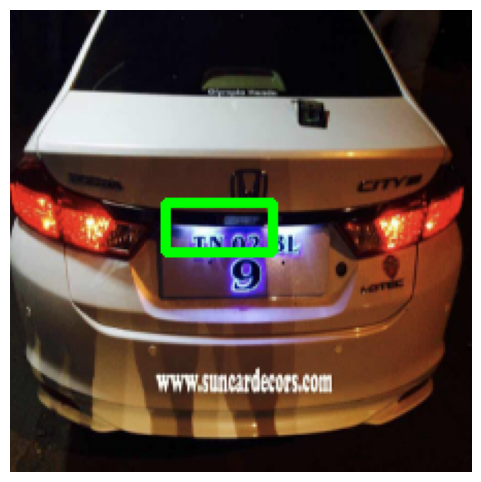

In [28]:

test_image = "Data/Images/Cars138.png"  # Update this path to the correct location
detect_car_plate(test_image)